##Introduction
This notebook demonstrates how to use the pyRDDLGym package to simulate and visualize an Reinforcement Learning (RL) environment. In this notebook, we will set up the environment and an agent, and then run an agent-environment loop to perform a task in the environment. Specifically, we will be using the example environment "HVAC" provided by pyRDDLGym, and a random agent to perform an action in the environment.

Reference: https://ataitler.github.io/IPPC2023/infrastructure.html

⚠️ **Note:** This Colab notebook has been created based on my current understanding of RDDL, which I have recently learned. **While I have made every effort to ensure the accuracy and quality, there may be areas where my understanding is limited.** I welcome feedback and suggestions. Thank you for your understanding!

##Cloning the repository named "pyRDDLGym" from the GitHub 

In [43]:
!git clone https://github.com/ataitler/pyRDDLGym.git

fatal: destination path 'pyRDDLGym' already exists and is not an empty directory.


##Initializing environment in pyRDDLGym

In [44]:
#Changing the working directory to the "pyRDDLGym" directory
%cd /content/pyRDDLGym

/content/pyRDDLGym


In [45]:
#Installing all the required packages listed in the "requirements.txt" file
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Installing dependencies to run virtual display

In [46]:
!apt-get install -y xserver-xephyr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xserver-xephyr is already the newest version (2:1.20.13-1ubuntu1~20.04.8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [47]:
!apt install -y xvfb python-opengl 
!pip install gym pyvirtualdisplay 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-2build1).
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.8).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
#Setting up a virtual display using PyVirtualDisplay and IPython
from pyvirtualdisplay import Display
from IPython import display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [49]:
#Importing necessary modules from the pyRDDLGym package

from pyRDDLGym import RDDLEnv
from pyRDDLGym import ExampleManager


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
ENV = "UAV mixed"        #ENV-->string name of the desired example environment
EnvInfo = ExampleManager.GetEnvInfo(ENV)

In [51]:
#Creating Environment
myEnv = RDDLEnv.RDDLEnv(domain="/content/pyRDDLGym/pyRDDLGym/Examples/UAV/Mixed/domain.rddl", instance="/content/pyRDDLGym/pyRDDLGym/Examples/UAV/Mixed/instance0.rddl")

Note: The instance.rddl file describes the specific instance of the environment with its initial state and objects, while the domain.rddl file describes the general structure of the environment, including the state variables, actions, and rewards.

In [52]:
#Action Space
print(f"Action Space: {myEnv.action_space}")

Action Space: Dict('set-acc___a1': Discrete(3, start=-1), 'set-phi___a1': Box(-1.0, 1.0, (1,), float32), 'set-theta___a1': Box(-1.0, 1.0, (1,), float32))


In [53]:
#Observation Space
print(f"Observation Space: {myEnv.observation_space}")

Observation Space: Dict('pos-x___a1': Box(-50000.0, 500000.0, (1,), float32), 'pos-y___a1': Box(-500000.0, 500000.0, (1,), float32), 'pos-z___a1': Box(-50000.0, 50000.0, (1,), float32), 'theta___a1': Box(-inf, inf, (1,), float32), 'phi___a1': Box(-inf, inf, (1,), float32), 'psi___a1': Box(-inf, inf, (1,), float32), 'vel___a1': Box(-inf, inf, (1,), float32))


In [54]:
#Listing all the available instances of the problem
EnvInfo.list_instances()

['instance0.rddl']

In [55]:
# set up the environment visualizer
myEnv.set_visualizer(EnvInfo.get_visualizer())

#Interacting with the Environment

pyRDDLGym is build on Gym as so implements the classic “agent-environment loop”. The infrastructure comes with two simple agents:

1. NoOpAgent - which allows the environment to evolve according to the default behavior as specified in the RDDL file.
2. RandomAgent - which sends a rendom action according to the env.action_space and the maximum number of allowed concurrent actions as specified in the RDDL file.

In [56]:
from pyRDDLGym.Policies.Agents import RandomAgent


In [57]:
# set up an aget
agent = RandomAgent(action_space=myEnv.action_space, num_actions=myEnv.numConcurrentActions)

This line of code sets up a RandomAgent that takes actions in the environment. The action_space argument is the space of all possible actions the agent can take, while num_actions is the number of concurrent actions the agent can take at once.

In [58]:
print(f"Maximum number of time steps that the agent will take in the environment before the episode is terminated: {myEnv.horizon}")

Maximum number of time steps that the agent will take in the environment before the episode is terminated: 20


###Agent-Environment Interaction Loop

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

total_reward = 0
state = myEnv.reset()
img = plt.imshow(myEnv.render('rgb_array'))

#Agent-Environment Loop
for _ in range(myEnv.horizon):
      myEnv.render()
      next_state, reward, done, info = myEnv.step(agent.sample_action())
      total_reward += reward
      state = next_state

      img.set_data(myEnv.render('rgb_array')) # just update the data
      plt.axis('off')
      plt.show()
      
      if done:
            break
            
myEnv.close()

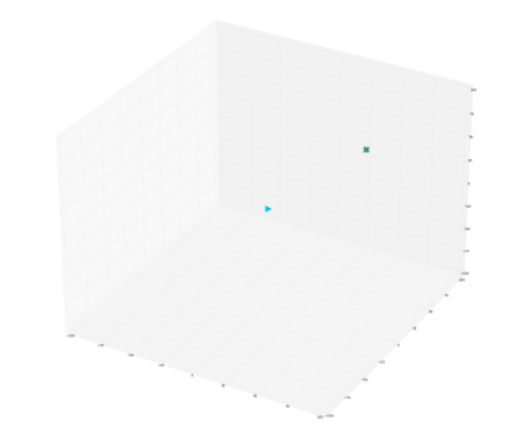

Note:
1. If encountering the error message **"display Surface quit"**, the solution would be to **restart the Runtime** and re-run the cells.

2. In this example, we only ran the loop for a fixed number of time steps (specified by the horizon parameter in the environment), but in practice, RL algorithms often run for much longer, often millions of time steps or more.